In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Выводим корреляционную матрицу
def show_correlation_map(df):
    cor = df.corr()
    plt.figure(figsize=(16,9))
    sns.heatmap(cor, center=0, cmap="RdYlGn", annot = True)
    plt.show()
    
def split_dataframe_by_column(df, split_col, sort_col): 
    hash_map = {}
    for key in df[split_col].unique():
        hash_map[key] = df[df[split_col]==key].drop(split_col, axis=1).sort_values(by=[sort_col], ascending=True).reset_index(drop=True)
    return hash_map


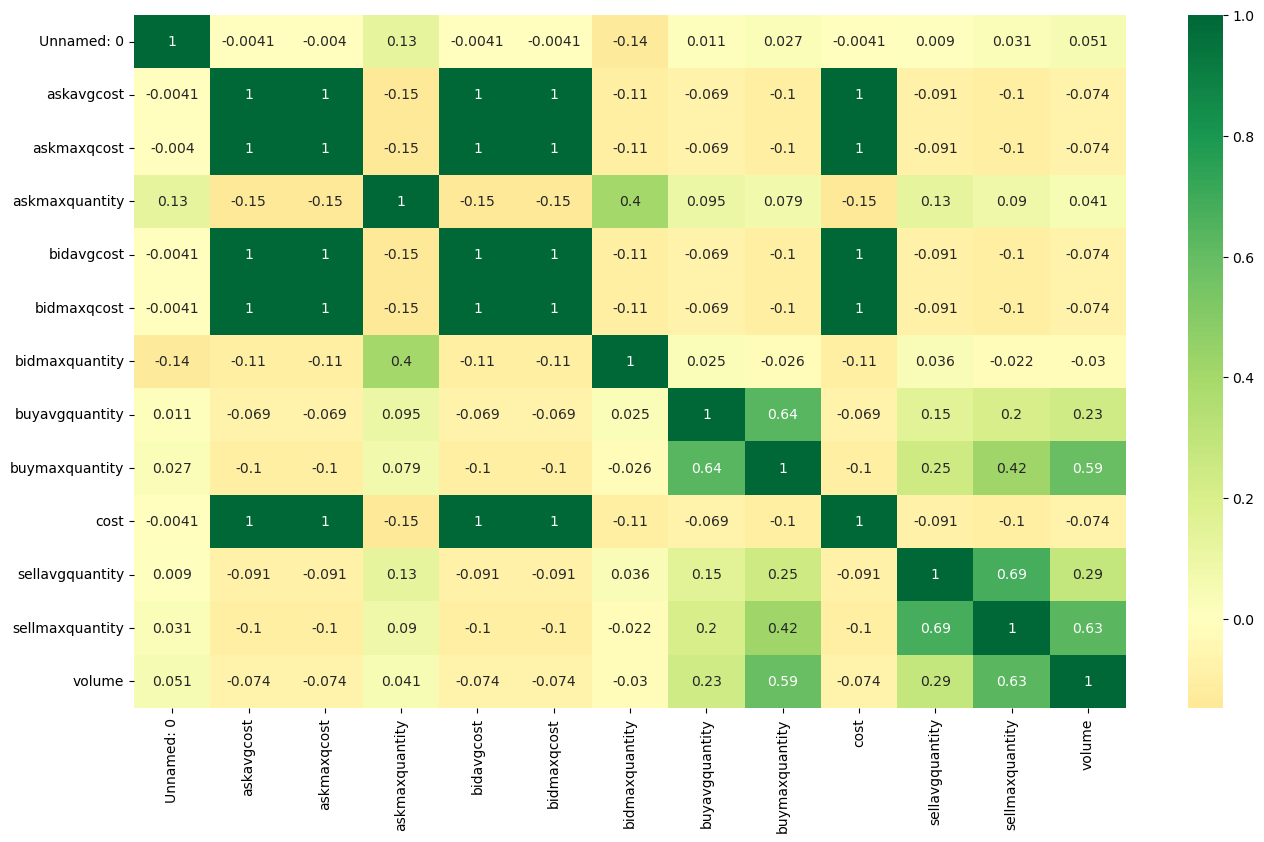

In [2]:
aggregated_trade_volume_df = pd.read_csv("aggregated_trade_volume.csv")

show_correlation_map(aggregated_trade_volume_df.drop(columns=['id']))

trade_volume_map = split_dataframe_by_column(aggregated_trade_volume_df, 'currency', 'timestamp')

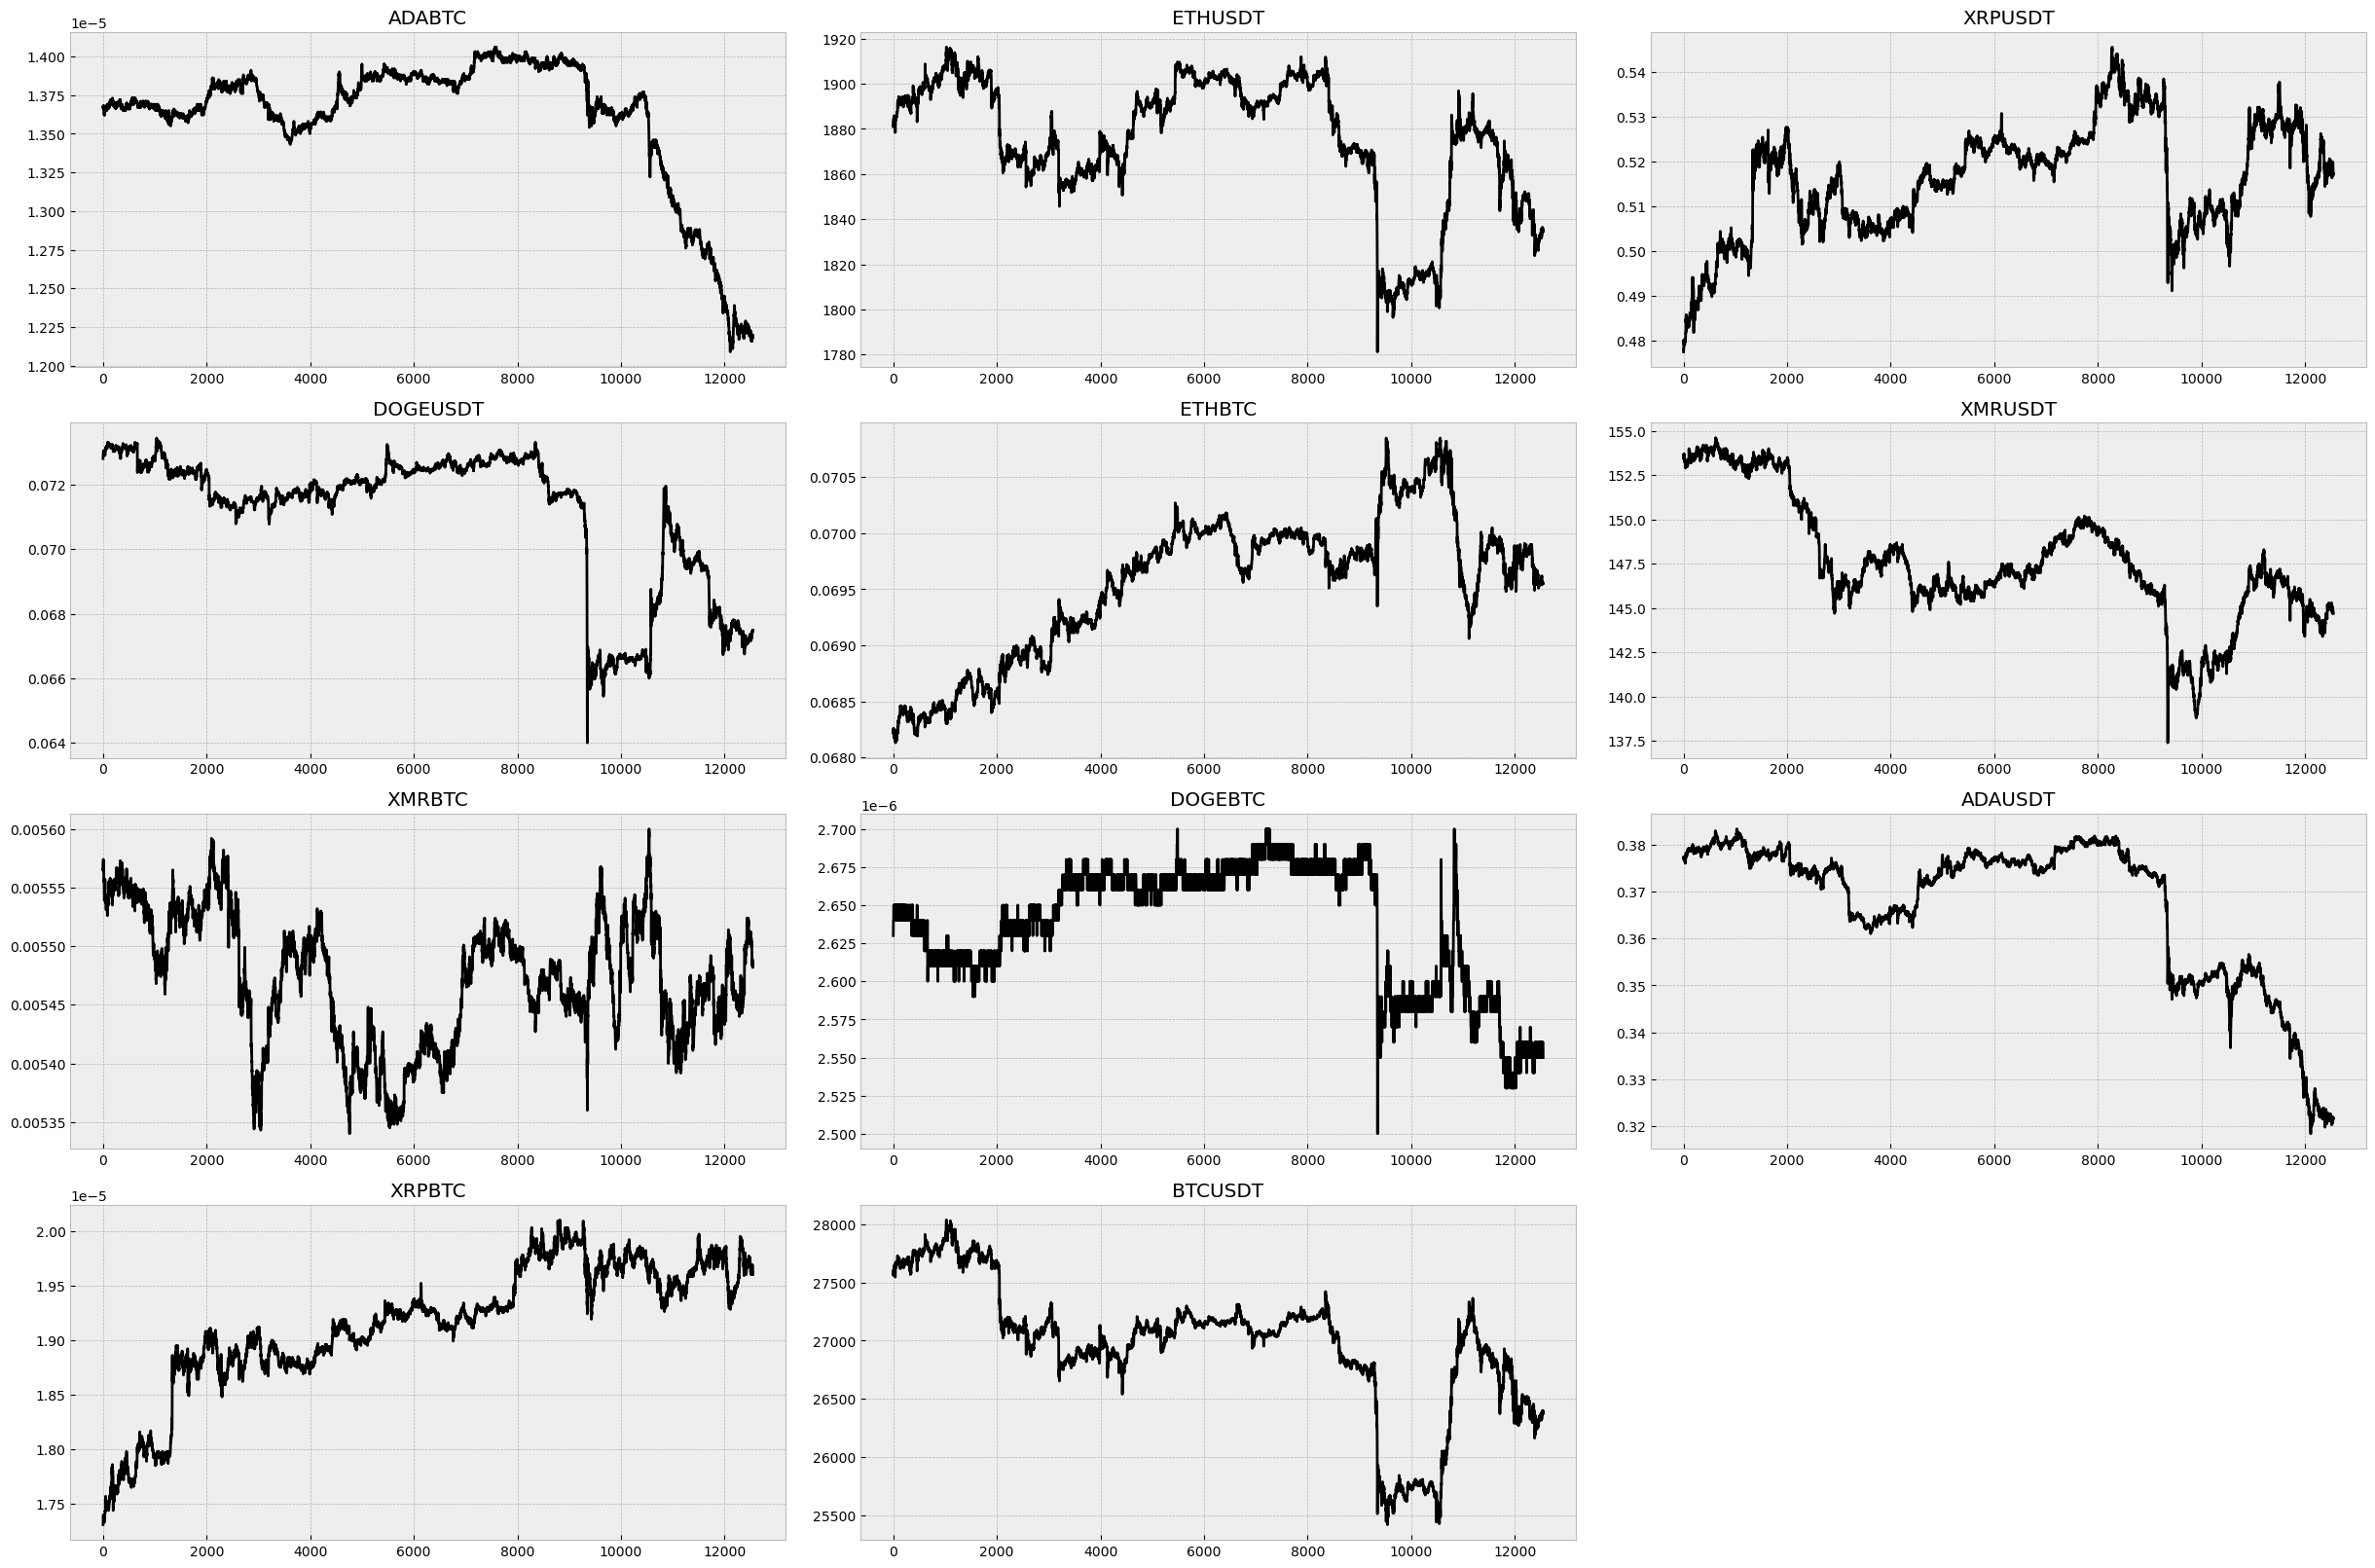

In [3]:
with plt.style.context('bmh'):
    plt.figure(figsize=(32, 20))
    x,y = 1,1
    for i, key in enumerate(trade_volume_map.keys()):
        ts_ax = plt.subplot2grid((5,4), (x, y))
        trade_volume_map[key]['cost'].plot(ax=ts_ax, color='black')
        ts_ax.set_title(key)
    
        if x==4:
            x=1
            y=y+1
        else:
            x=x+1
    plt.tight_layout()
    